In [1]:
from transform_ps.etl.data_type import DataFactory

In [2]:
factory = DataFactory()

In [3]:
donor = factory.create_data_type('donor')
tix = factory.create_data_type('ticket')

### Import data for tickets and donors

In [4]:
tix.get_data(fys=[19, 20])
donor.get_data(fys=13)

### Execute the tier analysis and get the aggregated data back

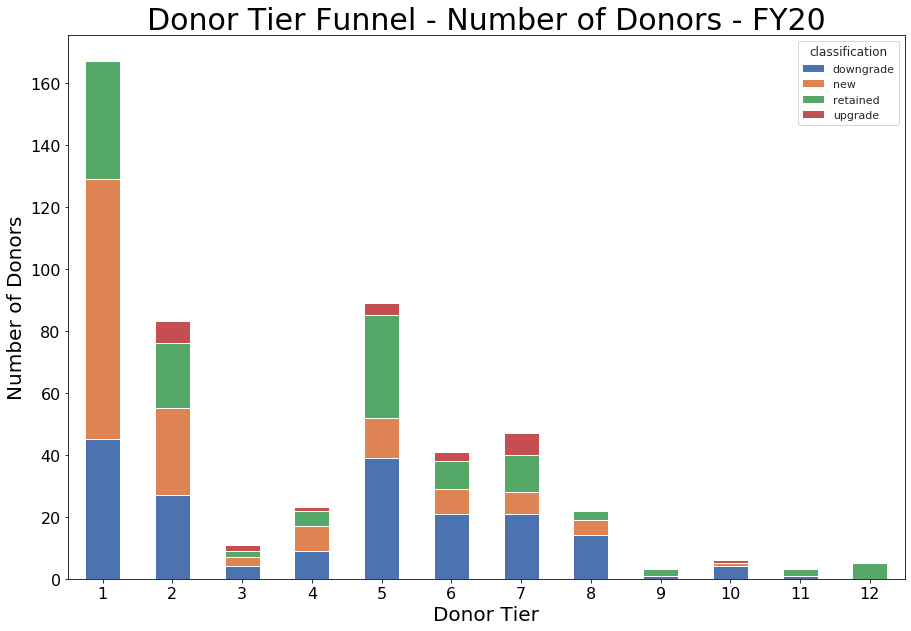

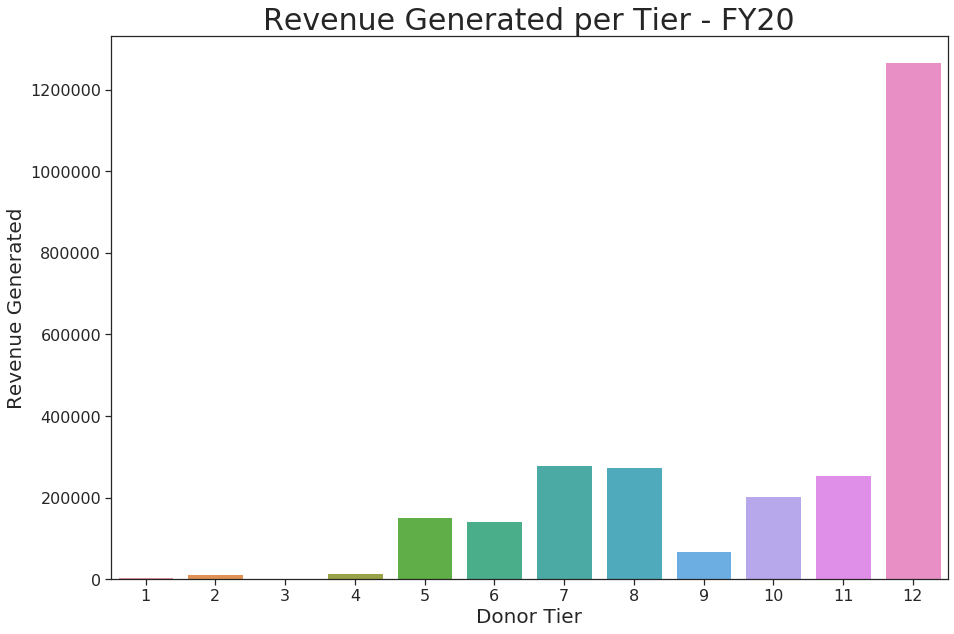

In [5]:
agg = donor.type.tier_analysis.execute(data=donor.working, fy=20)

In [6]:
agg.set_index('classification', inplace=True)

### Identify the high capacity prospects

In [8]:
high_cap = donor.type.get_high_cap_prospects(data=donor.working, fy=20)

### Identify high capacity activities (activities are determined through number of concert purchases)

In [9]:
high_cap_mask = tix.working.summary_cust_id.isin(high_cap)
high_cap_tix = tix.working.loc[high_cap_mask].reset_index(drop=True)
high_cap_activities = high_cap_tix[['perf_dt', 'customer_no']].drop_duplicates()

### Get the KPIs

In [10]:
kpis = {
    'upgrade': f"{round(agg.loc['upgrade']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'downgrade': f"{round(agg.loc['downgrade']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'total retention': f"{round(agg.loc['total retained to date']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'high capacity prospects': len(high_cap),
    'avg activities by high cap prospects': len(high_cap_activities) / len(high_cap)
}

In [11]:
kpis

{'upgrade': '1.24%',
 'downgrade': '9.25%',
 'total retention': '24.86%',
 'high capacity prospects': 433,
 'avg activities by high cap prospects': 0.9076212471131639}